# Introduction

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 

# Module Import

In [1]:
import _pickle as Pickle
import os
import numpy as np
import matplotlib.pyplot as plt

# Data Pre-processing and Visualization

In [2]:
def load_CIFAR_batch(filename):
  #load single batch of cifar
    with open(filename, 'rb') as f:
        datadict = Pickle.load(f,encoding='bytes')
        X = datadict[b'data']
        Y = datadict[b'labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y

In [3]:
def load_CIFAR10(ROOT):
  #load all of cifar
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, '/Users/jinxiaoyang/Desktop/INFO7390/Assign2/data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)    
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, '/Users/jinxiaoyang/Desktop/INFO7390/Assign2/test_batch'))
    return Xtr, Ytr, Xte, Yte

In [4]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
#Load the CIFAR-10 dataset, and divide the sample into training set, validation set and test set
def get_CIFAR10_data(num_training=49000, num_val=1000, num_test=10000, show_sample=True):
    cifar10_dir = 'cifar-10-batches-py/'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # subsample the data for validation set
    mask = range(num_training, num_training + num_val)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]
    return X_train, y_train, X_val, y_val, X_test, y_test

In [6]:
def subset_classes_data(classes):
    # Subset 'plane' and 'car' classes to perform logistic regression
    idxs = np.logical_or(y_train_raw == 0, y_train_raw == 1)
    X_train = X_train_raw[idxs, :]
    y_train = y_train_raw[idxs]
    # validation set
    idxs = np.logical_or(y_val_raw == 0, y_val_raw == 1)
    X_val = X_val_raw[idxs, :]
    y_val = y_val_raw[idxs]
    # test set
    idxs = np.logical_or(y_test_raw == 0, y_test_raw == 1)
    X_test = X_test_raw[idxs, :]
    y_test = y_test_raw[idxs]
    return X_train, y_train, X_val, y_val, X_test, y_test

In [7]:
def visualize_sample(X_train, y_train, classes, samples_per_class=7):
    #visualize some samples in the training datasets
    num_classes = len(classes)
    for y, cls in enumerate(classes):
        idxs = np.flatnonzero(y_train == y) # get all the indexes of cls
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs): # plot the image one by one
            plt_idx = i * num_classes + y + 1 # i*num_classes and y+1 determine the row and column respectively
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx].astype('uint8'))
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show()

In [8]:
def preprocessing_CIFAR10_data(X_train, y_train, X_val, y_val, X_test, y_test):
    
    # Preprocessing: reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1)) # [49000, 3072]
    X_val = np.reshape(X_val, (X_val.shape[0], -1)) # [1000, 3072]
    X_test = np.reshape(X_test, (X_test.shape[0], -1)) # [10000, 3072]
    
    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis = 0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    
    # Add bias dimension and transform into columns
    X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))]).T
    X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))]).T
    X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))]).T
    return X_train, y_train, X_val, y_val, X_test, y_test

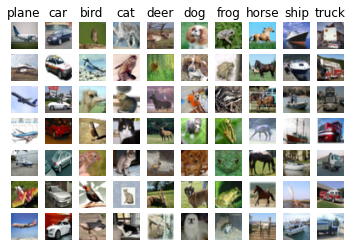

In [9]:
# Invoke the above functions to get our data
X_train_raw, y_train_raw, X_val_raw, y_val_raw, X_test_raw, y_test_raw = get_CIFAR10_data()
visualize_sample(X_train_raw, y_train_raw, classes)
subset_classes = ['plane', 'car']
X_train_raw, y_train_raw, X_val_raw, y_val_raw, X_test_raw, y_test_raw = subset_classes_data(subset_classes)
X_train, y_train, X_val, y_val, X_test, y_test = preprocessing_CIFAR10_data(X_train_raw, y_train_raw, X_val_raw, y_val_raw, X_test_raw, y_test_raw)

In [10]:
# As a sanity check, we print out th size of the training and test data dimenstion
print ('Train data shape: ', X_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Validation data shape: ', X_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', y_test.shape)

Train data shape:  (3073, 9794)
Train labels shape:  (9794,)
Validation data shape:  (3073, 206)
Validation labels shape:  (206,)
Test data shape:  (3073, 2000)
Test labels shape:  (2000,)


# Activation Functions

## sigmoid

In [11]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-1 * z))
    return s

## tanh

In [12]:
def tanh(z):
    s = (np.exp(z) - np.exp(-1 * z)) / (np.exp(z) + np.exp(-1 * z))
    return s

# Logistic Regression

## sigmoid log

In [13]:
#calculate cost and gradients
def propagatesig(w, b, X, Y):

    m = X.shape[1]

    A = sigmoid(np.dot(w.T,X)+b).reshape(X.shape[1])
    cost = np.sum(Y * np.log(A) + ((1 - Y) * np.log(1 - A))) / -m
    
    #stochastic gradient descent
    k = np.random.randint(m)
    
    dw = np.dot(X[:,k],(A[k] - Y[k]).T)/m #kth column of X
    db = (A[k] - Y[k])/m
    
    #gradient descent
    #dw = np.dot(X,(A - Y).T)/m
    #db = (np.sum(A - Y))/m

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [14]:
#iteratea and optize weights and bias
def optimizesig(w, b, X, Y, num_iterations, learning_rate, print_cost = False):

    costs = []

    for i in range(num_iterations):

        grads, cost = propagatesig(w, b, X, Y)

        dw = grads["dw"]
        db = grads["db"]

        w -= learning_rate * dw
        b -= learning_rate * db

        if i % 100 == 0:
            costs.append(cost)

        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [15]:
#predtic if image is frog or non frog using logistic regression and optimized values for w and b
def predictsig(w, b, X):

    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T,X) + b).reshape(X.shape[1])

    for i in range(A.shape[0]):


        if A[i] < 0.5:
            Y_prediction[0,i] = 0
        elif A[i] > 0.5:
            Y_prediction[0,i] = 1
        pass

    assert(Y_prediction.shape == (1, m))

    return Y_prediction

In [23]:
#combine everything to form logistic regression model
from sklearn.metrics import f1_score

def modelsig(X_train, Y_train, X_test, Y_test, num_iterations = 1000, learning_rate = 0.5, print_cost = True):

    w = np.random.randn(X_train.shape[0],) * 0.1
    b = 0

    assert(w.shape == (X_train.shape[0],))
    assert(isinstance(b, float) or isinstance(b, int))

    parameters, grads, costs = optimizesig(w, b, X_train/(X_train.max()-X_train.min()), Y_train, num_iterations, learning_rate, print_cost = False)

    w = parameters["w"]
    b = parameters["b"]

    Y_prediction_test = predictsig(w, b, X_test/(X_test.max()-X_test.min()))
    Y_prediction_train = predictsig(w, b, X_train/(X_train.max()-X_train.min()))

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    #Calculate metrics globally by counting the total true positives, false negatives and false positives.
    print("F_sig_score_micro:{0:.6f}".format(f1_score(Y_prediction_test.reshape(y_test.shape[0]), y_test.reshape(y_test.shape[0]), average = 'micro')))
    #Only report results for the class specified by pos_label. This is applicable only if targets (y_{true,pred}) are binary.
    print("F_sig_score_binary:{0:.6f}".format(f1_score(Y_prediction_test.reshape(y_test.shape[0]), y_test.reshape(y_test.shape[0]), average = 'binary')))
    #Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.
    print("F_sig_score_weighted:{0:.6f}".format(f1_score(Y_prediction_test.reshape(y_test.shape[0]), y_test.reshape(y_test.shape[0]), average = 'weighted')))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d, costs

train accuracy: 77.98652236062895 %
test accuracy: 79.75 %
F_sig_score_micro:0.797500
F_sig_score_binary:0.795144
F_sig_score_weighted:0.797527


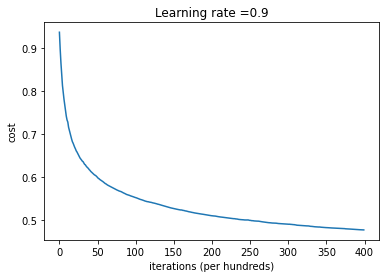

In [25]:
d,costs = modelsig(X_train, y_train, X_test, y_test, num_iterations = 4000, learning_rate = 0.9, print_cost = True)

#plot learning curve

plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

## tanh log

In [26]:
#calculate cost and gradients
def propagatetan(w, b, X, Y):

    m = X.shape[1]

    A = tanh(np.dot(w.T,X) + b).reshape(X.shape[1])
    cost = np.sum((1 + Y) * np.log(((1 + A) / 2))+(1 - Y) * np.log((1 - A)) / 2) / -m # log loss function

    
    #stochastic gradient descent
    k = np.random.randint(X.shape[1])

    dw = np.dot(X[:,k],(A[k]-Y[k]).T)/m
    db = (A[k]-Y[k])/m
    
    #gradient descent
    #dw = np.dot(X,(A - Y).T)/m
    #db = (np.sum(A - Y))/m

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [27]:
#iteratea and optize weights and bias
def optimizetan(w, b, X, Y, num_iterations, learning_rate, print_cost = False):

    costs = []

    for i in range(num_iterations):

        grads, cost = propagatetan(w, b, X, Y)

        dw = grads["dw"]
        db = grads["db"]

        w -= learning_rate * dw
        b -= learning_rate * db

        if i % 100 == 0:
            costs.append(cost)

        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [28]:
#predtic if image is frog or non frog using logistic regression and optimized values for w and b
def predicttan(w, b, X):

    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    A = tanh(np.dot(w.T,X)+b).reshape(X.shape[1])

    for i in range(A.shape[0]):


        if A[i] < 0.5:
            Y_prediction[0,i] = 0
        elif A[i] > 0.5:
            Y_prediction[0,i] = 1
        pass

    assert(Y_prediction.shape == (1, m))

    return Y_prediction

In [29]:
#combine everything to form logistic regression model
from sklearn.metrics import f1_score

def modeltan(X_train, Y_train, X_test, Y_test, num_iterations = 1000, learning_rate = 0.5, print_cost = True):

    w = np.random.randn(X_train.shape[0],) * 0.1
    b = 0

    assert(w.shape == (X_train.shape[0],))
    assert(isinstance(b, float) or isinstance(b, int))

    parameters, grads, costs = optimizetan(w, b, X_train/(X_train.max()-X_train.min()), Y_train, num_iterations, learning_rate, print_cost = False)

    w = parameters["w"]
    b = parameters["b"]

    Y_prediction_test = predicttan(w, b, X_test/(X_test.max()-X_test.min()))
    Y_prediction_train = predicttan(w, b, X_train/(X_train.max()-X_train.min()))

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    #Calculate metrics globally by counting the total true positives, false negatives and false positives.
    print("F_sig_score_micro:{0:.6f}".format(f1_score(Y_prediction_test.reshape(y_test.shape[0]), y_test.reshape(y_test.shape[0]), average = 'micro')))
    #Only report results for the class specified by pos_label. This is applicable only if targets (y_{true,pred}) are binary.
    print("F_sig_score_binary:{0:.6f}".format(f1_score(Y_prediction_test.reshape(y_test.shape[0]), y_test.reshape(y_test.shape[0]), average = 'binary')))
    #Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.
    print("F_sig_score_weighted:{0:.6f}".format(f1_score(Y_prediction_test.reshape(y_test.shape[0]), y_test.reshape(y_test.shape[0]), average = 'weighted')))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    

    return d, costs

train accuracy: 73.50418623647131 %
test accuracy: 73.05 %
F_sig_score_micro:0.730500
F_sig_score_binary:0.740741
F_sig_score_weighted:0.730921


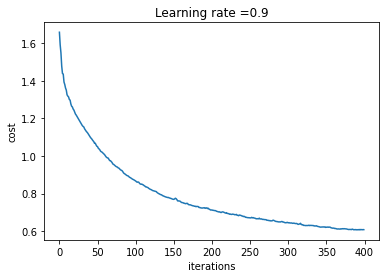

In [30]:
d,costs = modeltan(X_train, y_train, X_test, y_test, num_iterations = 4000, learning_rate = 0.9, print_cost = True)

#plot learning curve
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()